In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [2]:
data = pd.read_csv("traffic.csv") 

In [12]:
time_series=data['Junction']
result = adfuller(time_series)
print('ADF Statistic:', result[0])
print('p-value: ',result[1])
print('Critical Values: ',result[4])

if result[1] <= 0.05:
    print('Reject the null hypothesis. The data is stationary.')
else:
    print('Fall to reject the null hypothesis.The data is non-stationary')

ADF Statistic: -0.3233541182095162
p-value:  0.9221309443842827
Critical Values:  {'1%': -3.4304859057519437, '5%': -2.8616000674994804, '10%': -2.5668019719523705}
Fall to reject the null hypothesis.The data is non-stationary


In [3]:
data['DateTime'] = pd.to_datetime(data['DateTime'])


In [4]:
junction_data = data[data['Junction'] == 1]

In [5]:
time_series = junction_data[['DateTime', 'Vehicles']]
time_series.set_index('DateTime', inplace=True)
time_series = time_series['Vehicles']


In [6]:
train_size = int(len(time_series) * 0.8)
train, test = time_series[:train_size], time_series[train_size:]

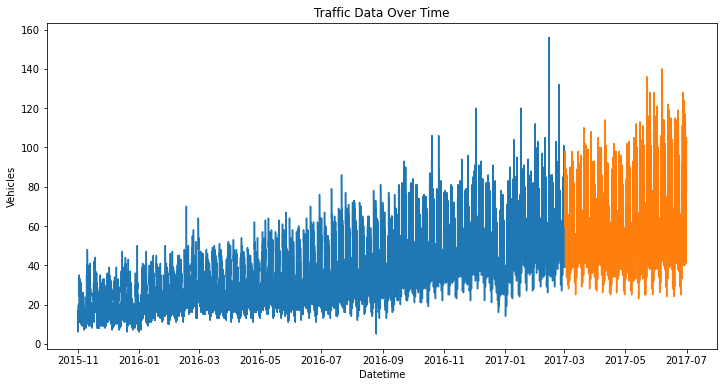

In [13]:
plt.figure(figsize=(12, 6))
plt.plot(train, label='Training Data')
plt.plot(test, label='Testing Data')
plt.title('Traffic Data Over Time')
plt.xlabel('Datetime')
plt.ylabel('Vehicles')
plt.show()

In [7]:
p = 1
d = 1
q = 1
model = ARIMA(train, order=(p, d, q))
model_fit = model.fit()


C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


In [15]:
print(model_fit.summary())


                               SARIMAX Results                                
Dep. Variable:               Vehicles   No. Observations:                11673
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -36628.703
Date:                Fri, 17 Nov 2023   AIC                          73263.406
Time:                        10:58:35   BIC                          73285.500
Sample:                    11-01-2015   HQIC                         73270.827
                         - 03-01-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5786      0.025     23.163      0.000       0.530       0.628
ma.L1         -0.4026      0.028    -14.447      0.000      -0.457      -0.348
sigma2        31.1387      0.204    152.771      0.0

In [8]:
# Make predictions on the test set
forecast_steps = len(test)
predictions = model_fit.forecast(steps=forecast_steps)

In [9]:
# Calculate MAE, MSE, and MAPE
mae = mean_absolute_error(test, predictions)
mse = mean_squared_error(test, predictions)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((test - predictions) / np.where(test != 0, test, 1))) * 100

In [10]:
# Print the performance metrics
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Absolute Percentage Error (MAPE): {mape}')

Mean Absolute Error (MAE): 21.68342068818613
Mean Squared Error (MSE): 759.2846708724967
Root Mean Squared Error (RMSE): 27.55512059259579
Mean Absolute Percentage Error (MAPE): 30.443062304929864


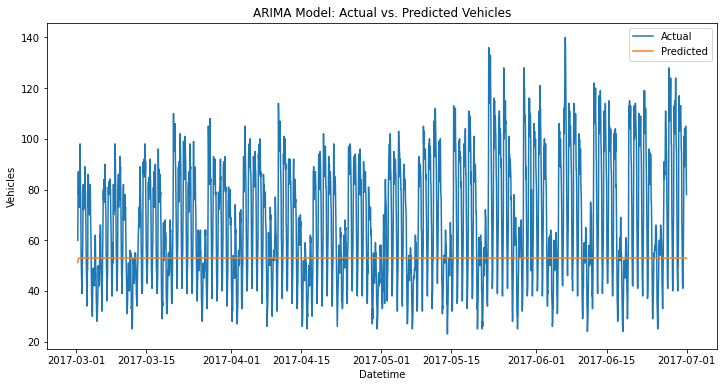

In [11]:
plt.figure(figsize=(12, 6))
plt.plot(test.index, test, label='Actual')
plt.plot(predictions.index, predictions, label='Predicted')
plt.title('ARIMA Model: Actual vs. Predicted Vehicles')
plt.xlabel('Datetime')
plt.ylabel('Vehicles')
plt.legend()
plt.show()